# Кластеризация

Реализовать алгоритмы кластеризации:
* KMeans(random)
* MiniBatchKMeans

Прототип класса:

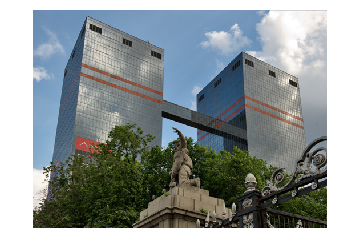

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = mpimg.imread('./mailru.jpg')
plt.axis("off")
plt.imshow(image)
plt.show()

data = image.reshape((image.shape[0]*image.shape[1],3))

In [13]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import time

params = {'figure.subplot.left': 0.0,
          'figure.subplot.right': 1.0,
          'figure.subplot.bottom': 0.0,
          'figure.subplot.top': 1.0}
plt.rcParams.update(params)

fig = plt.figure()
ax = fig.gca(projection='3d')

image = mpimg.imread('./mailru.jpg')
data = image.reshape((image.shape[0] * image.shape[1], 3))

clusters = 64
d_min = np.min(data)
d_max = np.max(data)
ax.set_xlim(d_min, d_max)
ax.set_ylim(d_min, d_max)
ax.set_zlim(d_min, d_max)
plt.xlabel("X")
plt.ylabel("Y")


class KMean:  # или MiniBatchKMeans
    def __init__(self, clusters, init=0):
        self.clusters = clusters
        pass

    def fit(self, data):
        d_min = np.min(data)
        d_max = np.max(data)
        centers = np.ndarray([self.clusters, data.shape[1]])
        for ce_ind in range(self.clusters):
            for c_ind in range(data.shape[1]):
                centers[ce_ind][c_ind] = np.random.randint(d_min, d_max)

        # cT[3, 64]
        cT = centers.T
        # dataT[196215, 3]
        dataT = data.T

        # surf = ax.scatter(dataT[0], dataT[1], dataT[2])
        surf = ax.scatter(cT[0], cT[1], cT[2])
        for indo in range(0, len(data)):
            pass
        ax.set_zlim(d_min, d_max)
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.show()
        pass

    def predict(self, data):
        pass

# KMean(64).fit(data)


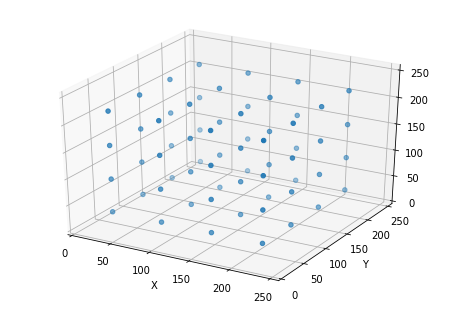

In [14]:
centers = np.zeros([clusters, data.shape[1]])

# random centers
# for ce_ind in range(clusters):
#     for c_ind in range(data.shape[1]):
#         centers[ce_ind][c_ind] = np.random.randint(d_min, d_max)

# normal centers
loopst = int(d_max/pow(clusters, 1/3))
for ix in range(int(loopst/2), 255, loopst):
    for iy in range(int(loopst/2), 255, loopst):
        for iz in range(int(loopst/2), 255, loopst):
            centers[int(ix/loopst)*16 +
                    int(iy/loopst)*4 +
                    int(iz/loopst)] = np.array([ix, iy, iz])
# print(centers)
ax.scatter(centers.T[0], centers.T[1], centers.T[2])
plt.show()

43.59374523162842
30
43.093233585357666
23
42.51277780532837
20
42.69627785682678
18
42.21097755432129
16
42.107670068740845
16
42.624414682388306
16
43.294368267059326
15
42.407540798187256
11
42.77609610557556
8
42.66091060638428
7
46.744521141052246
3
44.040198802948
7
44.81267714500427
8
43.72042775154114
7
43.87268662452698
3
43.461808919906616
4
44.88182330131531
4
44.57568669319153
2
42.69849371910095
3
43.4277777671814
3
43.547178983688354
2
43.69865679740906
2
42.68958568572998
1
43.006510972976685
3
42.40909957885742
1
43.04828596115112
2
42.536088943481445
2
44.019184589385986
1
43.50279235839844
1
43.34505081176758
0
[[   7.   10.    3.]
 [  31.   31.   23.]
 [  31.   31.  157.]
 [  31.   31.  220.]
 [  20.   27.    8.]
 [  41.   68.   94.]
 [  58.   84.  109.]
 [  31.   94.  220.]
 [  31.  157.   31.]
 [  31.  157.   94.]
 [  31.  157.  157.]
 [  31.  157.  220.]
 [  31.  220.   31.]
 [  31.  220.   94.]
 [  31.  220.  157.]
 [  31.  220.  220.]
 [  41.   43.   41.]
 [  62

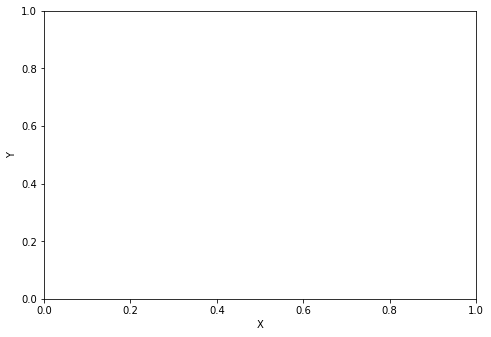

In [15]:
def init_list_of_objects(size):
    list_of_objects = list()
    for i in range(0, size):
        list_of_objects.append(list())
    return list_of_objects


iteration = 0
new_cnt = 1
while new_cnt > 0:
    new_cnt = 0
    t0 = time.time()
    # dots_according_clusters
    cent_data = init_list_of_objects(clusters)
    cent_arr = np.ndarray([clusters, 1])
    for eachD in range(len(data)):
        minRo = float("inf")
        min_ind = int(0)
        for eachC in range(len(centers)):
            ro = np.linalg.norm(centers[eachC] - data[eachD])
            if minRo > ro:
                minRo, ro = ro, minRo
                min_ind = eachC
        cent_data[min_ind].append(eachD)
    # new_center_of_mass
    for string_n in range(len(cent_data)):
        if len(cent_data[string_n]) > 0:
            new_cen = np.zeros([1, 3])
            dif_cen = np.zeros([1, 3])
            for elem_s in range(len(cent_data[string_n])):
                new_cen = new_cen + data[cent_data[string_n][elem_s]]
            dif_cen = (new_cen / (len(cent_data[string_n]))).astype(int)
            if (centers[string_n] - dif_cen != np.zeros([1, 3])).all():
                new_cnt += 1
            centers[string_n] = dif_cen
    iteration += 1


In [4]:
cT[0]

array([  32.,  222.,  157.,  190.,  158.,  216.,  160.,  201.,  184.,
        220.,  187.,  208.,  118.,   25.,  127.,  193.,  116.,  226.,
         88.,  206.,   96.,  223.,  178.,  202.,  180.,  176.,  217.,
        125.,   60.,  185.,   13.,   29.,  140.,   60.,   22.,   44.,
         77.,  163.,   16.,  124.,   83.,  178.,   69.,  169.,  199.,
         70.,  157.,  124.,  188.,  145.,  160.,  235.,  199.,  232.,
        166.,  221.,  216.,   18.,   89.,   67.,   58.,   30.,  160.,  138.])

In [5]:
def init_list_of_objects(size):
    list_of_objects = list()
    for i in range(0,size):
        list_of_objects.append( list() )
    return list_of_objects

arto =  init_list_of_objects(64)
roArr = np.ndarray([data.shape[0], 1])
cent_arr = np.ndarray([clusters, 1])
for eachD in range(0, len(data) - 1):
    minRo = float("inf")
    for eachC in range(0, len(centers) - 1):
        ro = np.linalg.norm(centers[eachC] - data[eachD])
        if minRo > ro:
            minRo, ro = ro, minRo
            roArr[eachD] = eachC
for elem in range(0, len(roArr) - 1):
    arto[int(roArr[elem])].append(elem)
    
centers[47]

array([ 124.,  200.,   57.])

In [156]:
for string_n in range(0, len(arto) - 1):
    if len(arto[string_n]) > 0:
        for elems in range(0, len(arto[string_n]) - 1):
            new_cen = new_cen + data[arto[string_n][elems]]
        centers[string_n] = new_cen/(len(arto[string_n]))
        
centers[47]

array([ 8979.86170686,  9889.97216357,  9872.04794977])

Object `np.all` not found.


Результат:
* 2 варианта реализации алгоритма KMeans
* Сравнение времени работы п